In [2]:
from google.colab import drive

drive.mount('/content/gdrive')

df = pd.read_csv('gdrive/My Drive/USvideos.csv')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as mn
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA

sns.set(style="whitegrid")

def summary(df):
    pd.set_option('display.max_columns', 500)
    try:
        print(df.describe(include=[np.number]), '\n')
    except ValueError:
        print('', end='')
    try:
        print(df.describe(exclude=[np.number]))
    except ValueError:
        print('', end='')
    pd.set_option('display.max_columns', 5)

def head(df, full=True):
    if full:
        pd.set_option('display.max_columns', 500)
        print(df.head())
        pd.set_option('display.max_columns', 5)

    else:
        print(df.head())

def delete_cols(df, indexes):
    return df.drop(indexes, axis=1)

def aggregate(df, column, by):
    if type(by) is not list:
        tmp_df = df[[by, column]]
        pd.set_option('display.max_columns', 500)
        print(tmp_df.groupby([by]).describe())
        pd.set_option('display.max_columns', 5)
    else:
        tmp_df = df[by + [column]]
        pd.set_option('display.max_columns', 500)
        print(tmp_df.groupby(by).describe())
        pd.set_option('display.max_columns', 5)

def scatterplot(df, x, y, hue=None, size=None):
    _, ax = plt.subplots(figsize=(12, 8))
    sns.scatterplot(x, y, hue=hue, size=size, data=df, sizes=(20, 100), ax=ax)

def jointplot(df, x, y):
    sns.jointplot(x, y, kind='reg', data=df, height=8)

def histogram(df, x, bins=None):
    _, ax = plt.subplots(figsize=(12, 8))
    sns.distplot(df[x], ax=ax, bins=bins)

def boxplot(df, x=None, y=None, hue=None):
    _, ax = plt.subplots(figsize=(12, 8))
    if x is None:
        sns.boxplot(data=df, orient="h")
    elif type(x) is list:
        tmp_df = df[x]
        sns.boxplot(data=tmp_df, orient='h')
    else:
        sns.boxplot(x, y, hue=hue, data=df)

def correlation_matrix(df, figsize=(10, 10)):
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(df.corr(), vmax=1.0, center=0, fmt='.2f', square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})
    plt.show()

def n():
    print('\n')

def missing_vals(df):
    cols = df.isna().sum()/df.shape[0]
    cols = pd.DataFrame({'Column name': cols.index, 'Missing %': cols.values})
    rows = (df.isna().sum(axis=1)/df.shape[1]).value_counts()
    rows = pd.DataFrame({'Missing %': rows.index, 'Quantity': rows.values})
    print('Columns:')
    print(cols)
    n()
    print('Rows: ')
    print(rows)

def missing_vals_vis(df, figsize=(8, 4)):
    _, ax = plt.subplots(figsize=figsize)
    mn.matrix(df, ax=ax)
    _, ax2 = plt.subplots(figsize=figsize)
    mn.dendrogram(df, ax=ax2)
    _, ax3 = plt.subplots(figsize=figsize)
    mn.bar(df, ax=ax3)

def drop_mostly_missing(df, col_th=0.6, row_th=0.7):
    cols = df.isna().sum()/df.shape[0]
    cols = pd.DataFrame({'name': cols.index, 'missing': cols.values})
    df_tmp = cols.loc[cols['missing'] > col_th]
    df_tmp = df_tmp['name'].values
    ret_df = delete_cols(df, df_tmp)

    rows = ret_df.isna().sum(axis=1)/ret_df.shape[1]
    rows = pd.DataFrame({'index': rows.index, 'missing': rows.values})
    rows_tmp = rows.loc[rows['missing'] > row_th]
    rows_tmp = rows_tmp['index'].values
    ret_df = ret_df.drop(rows_tmp)

    return ret_df

def fill_missing(df, cols='all', strategy='median'):
    if cols == 'all':
        imputer = SimpleImputer(missing_values=np.nan, strategy=strategy)
        imputed_df = pd.DataFrame(imputer.fit_transform(df))
        imputed_df.columns = df.columns
        imputed_df.index = df.index
        return imputed_df
    else:
        imputer = SimpleImputer(missing_values=np.nan, strategy=strategy)
        imputed_df = pd.DataFrame(imputer.fit_transform(df[cols]))
        df[cols] = imputed_df.values
        return df

def normalize(df, scaler, cols='all'):
    if cols == 'all':
        scaled_df = pd.DataFrame(scaler.fit_transform(df))
        scaled_df.columns = df.columns
        scaled_df.index = df.index
        return scaled_df
    elif cols == 'numeric':
        cols = df.select_dtypes([np.number]).columns
        scaled_df = pd.DataFrame(scaler.fit_transform(df[cols]))
        df[cols] = scaled_df.values
        return df
    else:
        scaled_df = pd.DataFrame(scaler.fit_transform(df[cols]))
        df[cols] = scaled_df.values
        return df

def standardize(df, cols='all'):
    return normalize(df, StandardScaler(), cols)

def scale(df, cols='all'):
    return normalize(df, MinMaxScaler(), cols)

def categorical_features(df, cols):
    for c in cols:
        print(c)
        print(df[c].value_counts(), '\n')

def encode_categorical_features(df, cols, drop_first=False):
    return pd.get_dummies(df, columns=cols, drop_first=drop_first)

def pca(X, y=None, plot_cumvar=True, plot_2d=False):
    pca = PCA()
    pca_result = pca.fit_transform(X)
    cumvar = np.cumsum(pca.explained_variance_ratio_)
    cumvar_df = pd.DataFrame(data = {'PCA': np.arange(1, X.shape[1]+1), 'CumVar': cumvar})

    if plot_cumvar:
        plt.plot(np.arange(1, X.shape[1]+1), cumvar)
        plt.show()

    if plot_2d and y is not None:
        plt.figure(figsize=(10,6))
        sns.scatterplot(
            x=pca_result[:, 0], y=pca_result[:, 1],
            hue=y,
            palette=sns.color_palette("hls", len(set(y))),
            legend='full',
            alpha=0.3
        )

    return pca_result, cumvar_df, pca.components_ #n_components x n_features

In [3]:
df = delete_cols(df, ['video_id', 'trending_date', 'title', 'channel_title', 'publish_time', 'tags', 'thumbnail_link', 'video_error_or_removed', 'description'])
summary(df)

        category_id         views         likes      dislikes  comment_count
count  40949.000000  4.094900e+04  4.094900e+04  4.094900e+04   4.094900e+04
mean      19.972429  2.360785e+06  7.426670e+04  3.711401e+03   8.446804e+03
std        7.568327  7.394114e+06  2.288853e+05  2.902971e+04   3.743049e+04
min        1.000000  5.490000e+02  0.000000e+00  0.000000e+00   0.000000e+00
25%       17.000000  2.423290e+05  5.424000e+03  2.020000e+02   6.140000e+02
50%       24.000000  6.818610e+05  1.809100e+04  6.310000e+02   1.856000e+03
75%       25.000000  1.823157e+06  5.541700e+04  1.938000e+03   5.755000e+03
max       43.000000  2.252119e+08  5.613827e+06  1.674420e+06   1.361580e+06 

       comments_disabled ratings_disabled
count              40949            40949
unique                 2                2
top                False            False
freq               40316            40780


In [0]:
head(df)

   category_id    views   likes  dislikes  comment_count  comments_disabled  \
0           22   748374   57527      2966          15954              False   
1           24  2418783   97185      6146          12703              False   
2           23  3191434  146033      5339           8181              False   
3           24   343168   10172       666           2146              False   
4           24  2095731  132235      1989          17518              False   

   ratings_disabled  
0             False  
1             False  
2             False  
3             False  
4             False  


In [0]:
aggregate(df, 'likes', 'comments_disabled')

                        likes                                              \
                        count        mean          std     min        25%   
comments_disabled                                                           
False             40316.00000 75096.05063 230536.44314 0.00000 5589.00000   
True                633.00000 21445.21485  35287.31103 0.00000   99.00000   

                                                         
                          50%         75%           max  
comments_disabled                                        
False             18286.00000 55948.75000 5613827.00000  
True               3704.00000 28538.00000  233312.00000  


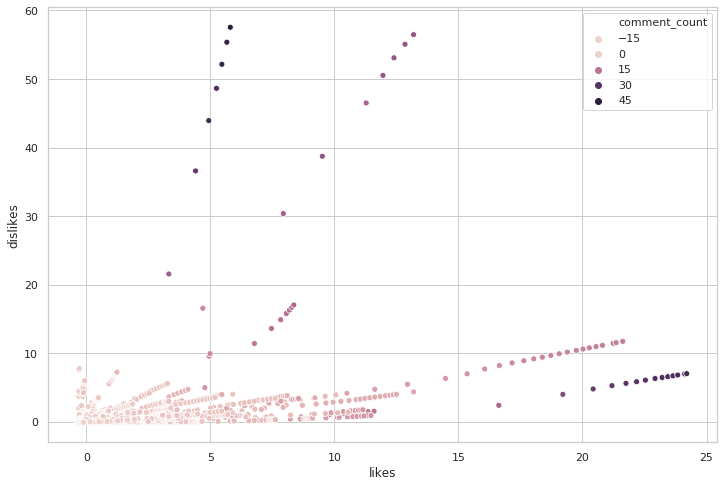

In [29]:
scatterplot(df, 'likes', 'dislikes', hue='comment_count')

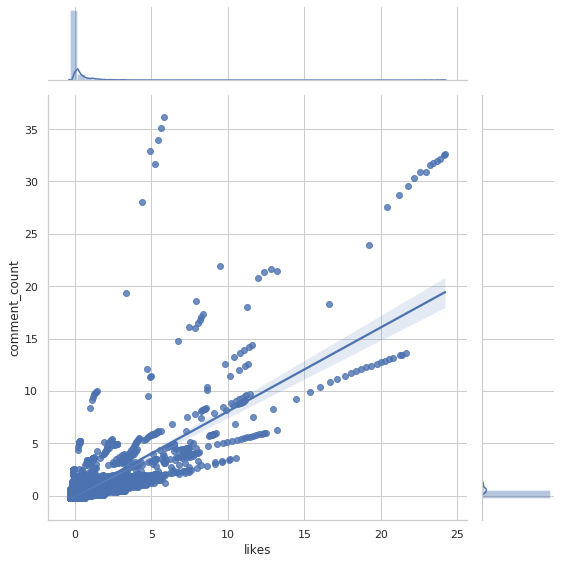

In [30]:
jointplot(df, 'likes', 'comment_count')

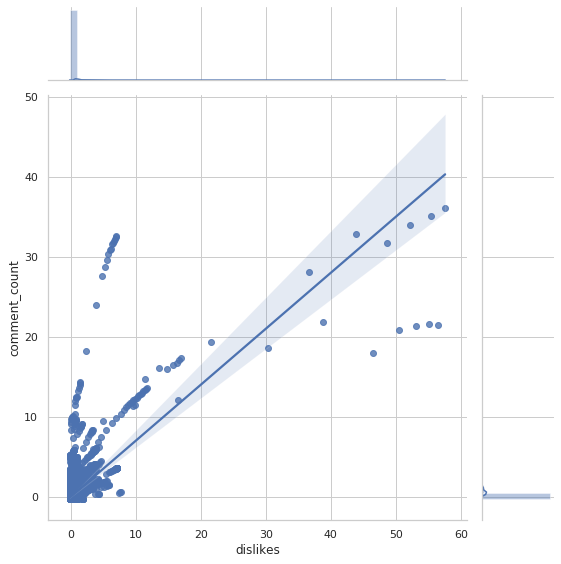

In [31]:
jointplot(df, 'dislikes', 'comment_count')

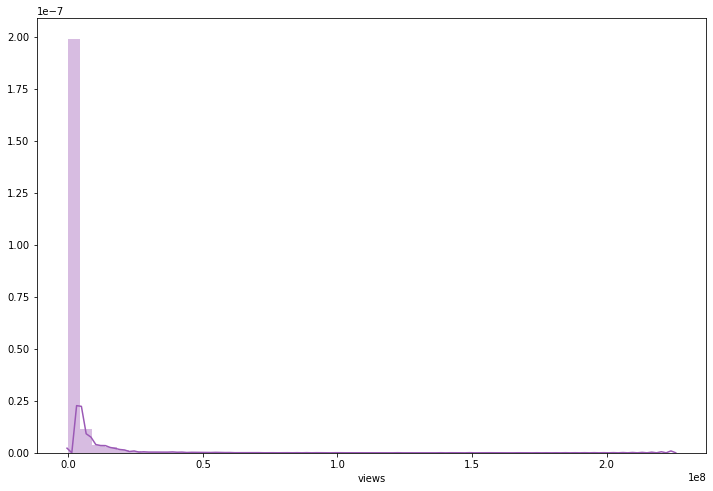

In [0]:
histogram(df, 'views')

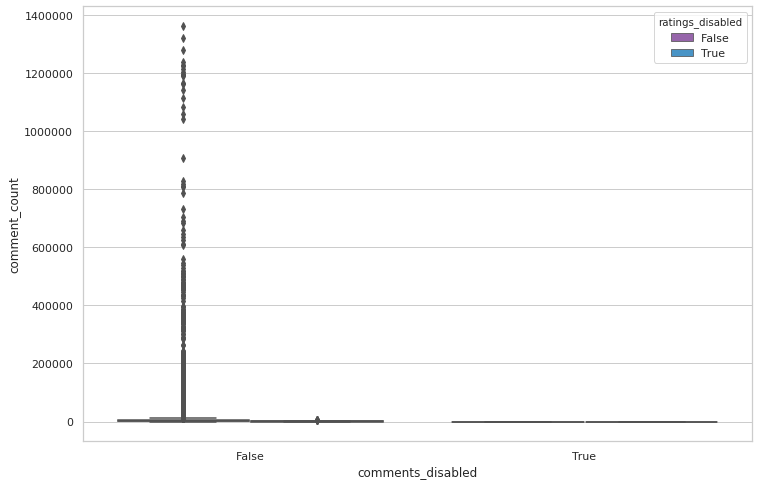

In [0]:
boxplot(df, x='comments_disabled', y='comment_count', hue='ratings_disabled')

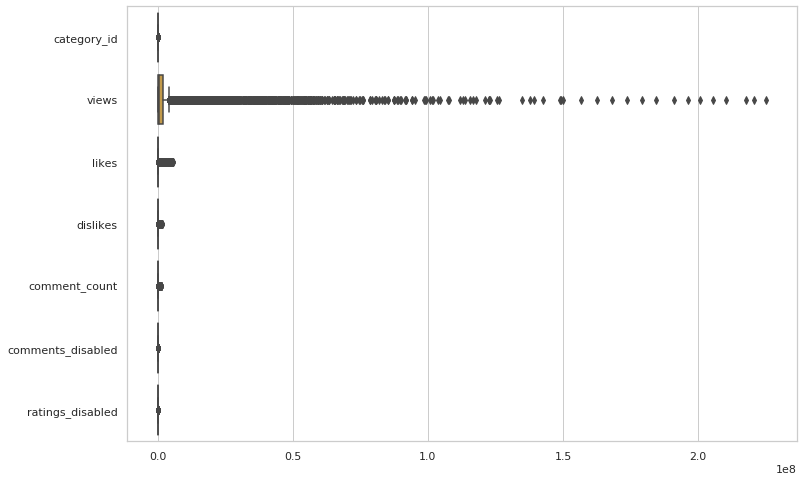

In [0]:
boxplot(df)

In [0]:
aggregate(df, 'views', ['comments_disabled', 'ratings_disabled'])

                                         views                               \
                                         count          mean            std   
comments_disabled ratings_disabled                                            
False             False            40253.00000 2360486.46312  7414615.58940   
                  True                63.00000  964191.26984  3291514.31877   
True              False              527.00000 1817993.14231  2447641.35169   
                  True               106.00000 6002661.47170 13912855.94844   

                                                                         \
                                          min          25%          50%   
comments_disabled ratings_disabled                                        
False             False             549.00000 244302.00000 683364.00000   
                  True             2068.00000  71540.50000 252254.00000   
True              False             748.00000 136706.50000 603783.00000

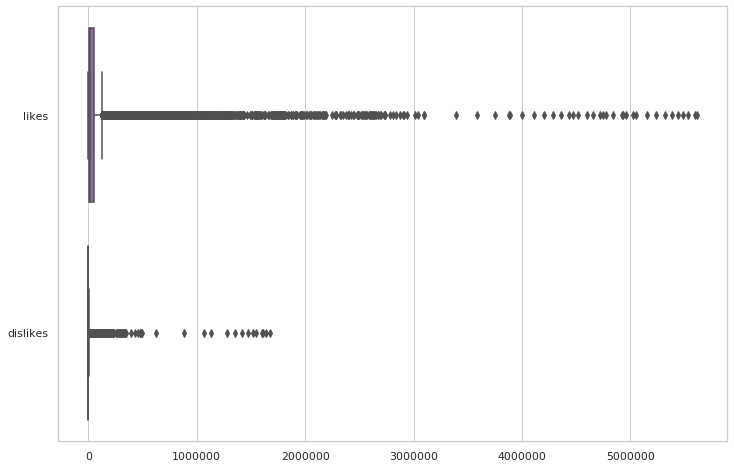

In [0]:
boxplot(df, x=['likes', 'dislikes'])

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/suchy1713/EmotionPredicition/master/data/preprocessed/merged.csv')

#drop emospace answers
df = df.drop(df[df['WIDGET-TYPE'] == 'emospace1'].index)

#drop useless features
df = df.drop(['TIMESTAMP', 'WIDGET-TYPE', 'COND', 'ANS-TIME', 'IADS-ID', 'IAPS-ID', 'ID', 'PROCEDURE-BEGIN-TIMESTAMP', 'PROCEDURE-END-TIMESTAMP', 'BIOSIGS-BEGIN-TIMESTAMP', 'BIOSIGS-END-TIMESTAMP', 'NEO-FFI', 'BIOSIGS', 'PROCEDURE', 'SPACE', 'FREUD', 'PHOTOS'], axis=1)

df = df.assign(NEUROTICISM=np.nan)
df = df.assign(OOO=np.nan)

In [0]:
missing_vals(df)

Columns:
         Column name  Missing %
0       COND-DETAILS    0.00000
1                ANS    0.00000
2                AGE    0.01613
3                SEX    0.00000
4           OPENNESS    0.17742
5  CONSCIENTIOUSNESS    0.17742
6       EXTRAVERSION    0.17742
7      AGREEABLENESS    0.17742
8        NEUROTICISM    1.00000
9                OOO    1.00000


Rows: 
   Missing %  Quantity
0    0.20000      9180
1    0.60000      1800
2    0.70000       180


In [0]:
df = drop_mostly_missing(df)

missing_vals(df)

Columns:
         Column name  Missing %
0       COND-DETAILS    0.00000
1                ANS    0.00000
2                AGE    0.01613
3                SEX    0.00000
4           OPENNESS    0.17742
5  CONSCIENTIOUSNESS    0.17742
6       EXTRAVERSION    0.17742
7      AGREEABLENESS    0.17742


Rows: 
   Missing %  Quantity
0    0.00000      9180
1    0.50000      1800
2    0.62500       180


In [0]:
df = fill_missing(df, cols=['OPENNESS', 'AGE', 'CONSCIENTIOUSNESS', 'EXTRAVERSION', 'AGREEABLENESS'])
missing_vals(df)

Columns:
         Column name  Missing %
0       COND-DETAILS    0.00000
1                ANS    0.00000
2                AGE    0.00000
3                SEX    0.00000
4           OPENNESS    0.00000
5  CONSCIENTIOUSNESS    0.00000
6       EXTRAVERSION    0.00000
7      AGREEABLENESS    0.00000


Rows: 
   Missing %  Quantity
0    0.00000     11160


In [0]:
summary(df)

        category_id         views         likes      dislikes  comment_count
count  40949.000000  4.094900e+04  4.094900e+04  4.094900e+04   4.094900e+04
mean      19.972429  2.360785e+06  7.426670e+04  3.711401e+03   8.446804e+03
std        7.568327  7.394114e+06  2.288853e+05  2.902971e+04   3.743049e+04
min        1.000000  5.490000e+02  0.000000e+00  0.000000e+00   0.000000e+00
25%       17.000000  2.423290e+05  5.424000e+03  2.020000e+02   6.140000e+02
50%       24.000000  6.818610e+05  1.809100e+04  6.310000e+02   1.856000e+03
75%       25.000000  1.823157e+06  5.541700e+04  1.938000e+03   5.755000e+03
max       43.000000  2.252119e+08  5.613827e+06  1.674420e+06   1.361580e+06 

       comments_disabled ratings_disabled
count              40949            40949
unique                 2                2
top                False            False
freq               40316            40780


In [4]:
categorical_features(df, ['category_id', 'comments_disabled', 'ratings_disabled'])

category_id
24    9964
10    6472
26    4146
23    3457
22    3210
25    2487
28    2401
1     2345
17    2174
27    1656
15     920
20     817
19     402
2      384
29      57
43      57
Name: category_id, dtype: int64 

comments_disabled
False    40316
True       633
Name: comments_disabled, dtype: int64 

ratings_disabled
False    40780
True       169
Name: ratings_disabled, dtype: int64 



In [5]:
df = encode_categorical_features(df, ['category_id'])
df = encode_categorical_features(df, ['comments_disabled', 'ratings_disabled'], drop_first=True)
summary(df)

              views         likes      dislikes  comment_count  category_id_1  \
count  4.094900e+04  4.094900e+04  4.094900e+04   4.094900e+04   40949.000000   
mean   2.360785e+06  7.426670e+04  3.711401e+03   8.446804e+03       0.057266   
std    7.394114e+06  2.288853e+05  2.902971e+04   3.743049e+04       0.232354   
min    5.490000e+02  0.000000e+00  0.000000e+00   0.000000e+00       0.000000   
25%    2.423290e+05  5.424000e+03  2.020000e+02   6.140000e+02       0.000000   
50%    6.818610e+05  1.809100e+04  6.310000e+02   1.856000e+03       0.000000   
75%    1.823157e+06  5.541700e+04  1.938000e+03   5.755000e+03       0.000000   
max    2.252119e+08  5.613827e+06  1.674420e+06   1.361580e+06       1.000000   

       category_id_2  category_id_10  category_id_15  category_id_17  \
count   40949.000000    40949.000000    40949.000000    40949.000000   
mean        0.009378        0.158050        0.022467        0.053090   
std         0.096384        0.364793        0.148198  

In [6]:
df = standardize(df)
summary(df)

              views         likes      dislikes  comment_count  category_id_1  \
count  4.094900e+04  4.094900e+04  4.094900e+04   4.094900e+04   4.094900e+04   
mean  -1.842337e-16 -9.664734e-16 -2.949822e-17   4.839335e-16  -3.713174e-15   
std    1.000012e+00  1.000012e+00  1.000012e+00   1.000012e+00   1.000012e+00   
min   -3.192086e-01 -3.244752e-01 -1.278499e-01  -2.256692e-01  -2.464650e-01   
25%   -2.865092e-01 -3.007774e-01 -1.208915e-01  -2.092652e-01  -2.464650e-01   
50%   -2.270650e-01 -2.454346e-01 -1.061133e-01  -1.760833e-01  -2.464650e-01   
75%   -7.271111e-02 -8.235535e-02 -6.108992e-02  -7.191562e-02  -2.464650e-01   
max    3.013936e+01  2.420263e+01  5.755239e+01   3.615100e+01   4.057371e+00   

       category_id_2  category_id_10  category_id_15  category_id_17  \
count   4.094900e+04    4.094900e+04    4.094900e+04    4.094900e+04   
mean    1.036794e-14    8.251219e-15   -7.694389e-15    4.711092e-15   
std     1.000012e+00    1.000012e+00    1.000012e+00  

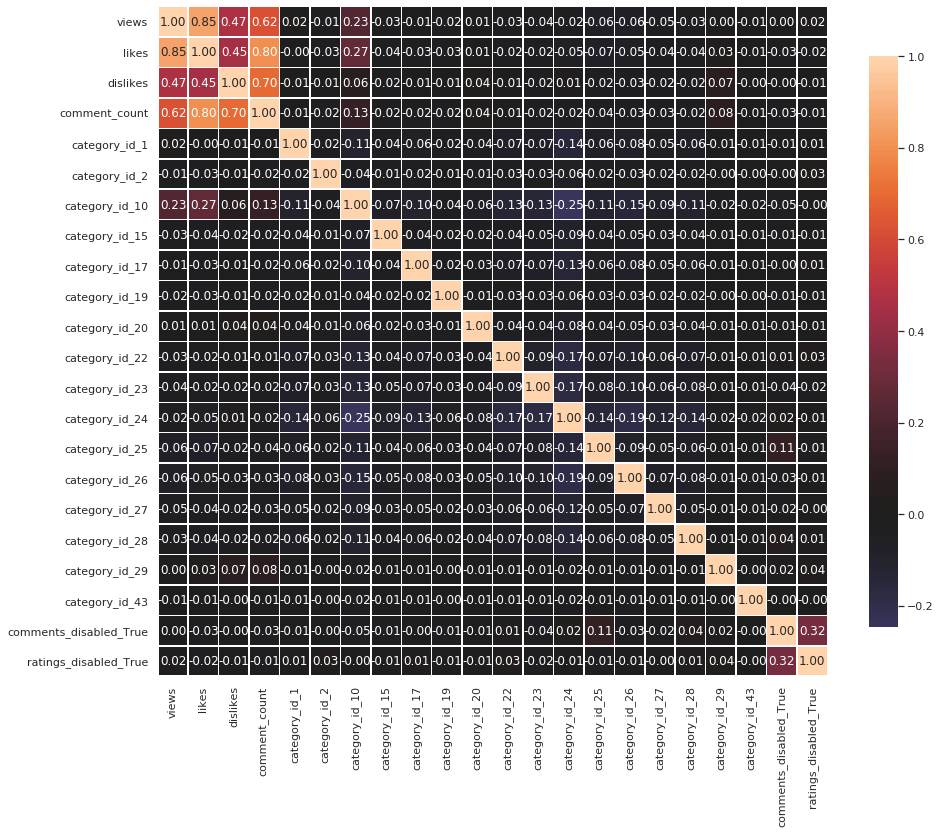

In [0]:
correlation_matrix(df, figsize=(15,15))

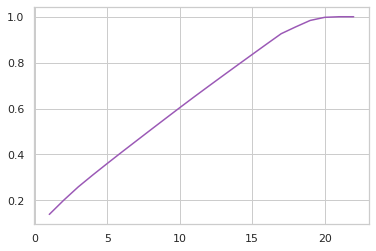

    PCA    CumVar
0     1  0.138736
1     2  0.200921
2     3  0.258748
3     4  0.310530
4     5  0.360715
5     6  0.410147
6     7  0.458822
7     8  0.507391
8     9  0.555613
9    10  0.603706
10   11  0.651120
11   12  0.697725
12   13  0.744000
13   14  0.789958
14   15  0.835607
15   16  0.881132
16   17  0.926100
17   18  0.955797
18   19  0.983912
19   20  0.997409
20   21  1.000000
21   22  1.000000


In [21]:
pca_result, var, comp = pca(df)
print(var)
#print(comp)

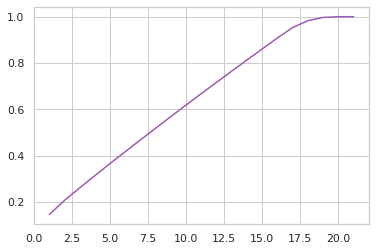

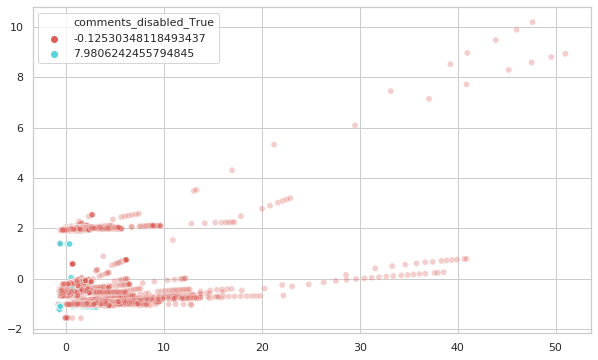

In [27]:
x = df.drop(columns=['comments_disabled_True'])
y = df['comments_disabled_True']

res, var, _ = pca(x, y, plot_2d=True)